# Lineare Regressionen

## Quelle der Daten

https://www.kaggle.com/datasets/captainozlem/framingham-chd-preprocessed-data (zuletzt aufgerufen: 01/2024)

https://www.framinghamheartstudy.org/ (zuletzt aufgerufen: 01/2024)

## Installation der Bibliotheken

In [1]:
import pandas as pd

import numpy as np

from numpy.ma.core import mean

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

## Einlesen und Aufteilung der Daten 

In [2]:
data = pd.read_excel("C:\\Users\\Tim\\Desktop\\Buchprojekt KI Medizin\\Programmierung\\Framingham_KHK.xlsx", sheet_name = "Tabelle1")

data = data.dropna()

data.head()

,ZehnJahreKHK,Geschlecht,Alter,Raucher,ZigProTag,BDMedikamente,Schlaganfall,ArtHypertonie,Diabetes,GesCholesterin,Systolisch,Diastolisch,BMI,Herzfrequenz,Blutzucker
1,0,M,39,0,0.0,0.0,0,0,0,195.0,106,70,27.0,80.0,77.0
2,0,W,46,0,0.0,0.0,0,0,0,250.0,121,81,29.0,95.0,76.0
3,0,M,48,1,20.0,0.0,0,0,0,245.0,128,80,25.0,75.0,70.0
4,1,W,61,1,30.0,0.0,0,1,0,225.0,150,95,29.0,65.0,103.0
5,0,W,46,1,23.0,0.0,0,0,0,285.0,130,84,23.0,85.0,85.0


In [4]:
data_new = pd.get_dummies(data, columns = ["Geschlecht"])

data_new.head()

,ZehnJahreKHK,Alter,Raucher,ZigProTag,BDMedikamente,Schlaganfall,ArtHypertonie,Diabetes,GesCholesterin,Systolisch,Diastolisch,BMI,Herzfrequenz,Blutzucker,Geschlecht_M,Geschlecht_W
1,0,39,0,0.0,0.0,0,0,0,195.0,106,70,27.0,80.0,77.0,1,0
2,0,46,0,0.0,0.0,0,0,0,250.0,121,81,29.0,95.0,76.0,0,1
3,0,48,1,20.0,0.0,0,0,0,245.0,128,80,25.0,75.0,70.0,1,0
4,1,61,1,30.0,0.0,0,1,0,225.0,150,95,29.0,65.0,103.0,0,1
5,0,46,1,23.0,0.0,0,0,0,285.0,130,84,23.0,85.0,85.0,0,1


In [5]:
x = data_new.iloc[:, 11]

y = data_new.iloc[:, 9]

In [6]:
x.head()

1    27.0
2    29.0
3    25.0
4    29.0
5    23.0
Name: BMI, dtype: float64

In [7]:
y.head()

1    106
2    121
3    128
4    150
5    130
Name: Systolisch, dtype: int64

## Berechnung der Regressionsgerade

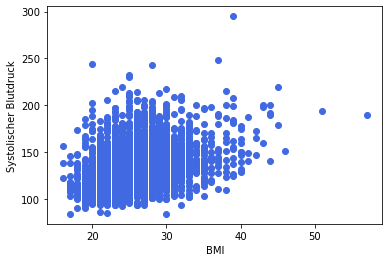

In [8]:
plt.xlabel("BMI")
plt.ylabel("Systolischer Blutdruck")
plt.scatter(x, y, c = "royalblue")

f(x) = 1.7808402593843886 * x + 86.48413789669348


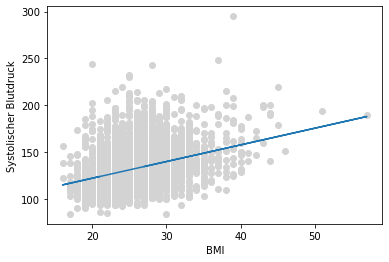

In [9]:
plt.xlabel("BMI")
plt.ylabel("Systolischer Blutdruck")
plt.scatter(x, y, c = "lightgrey")

xy_mean = mean(x * y)

m = (xy_mean - mean(x) * mean(y)) / ((mean(x**2)) - ((mean(x)**2)))
t = mean(y) - m * mean(x)

plt.plot(x, m * x + t)

print("f(x) =", m, "* x +", t)

In [1]:
bmi = int(input("Wie lautet der BMI (in kg/m²)? "))

syst = 1.7808402593844028 * bmi + 86.48413789669307

print("Der vorhergesagte systolische Blutdruck lautet:", syst, "mmHg")

Wie lautet der BMI (in kg/m²)? 25
Der vorhergesagte systolische Blutdruck lautet: 131.00514438130313 mmHg


## Multiple lineare Regression

In [18]:
x = data_new.iloc[:, [11]]

y = data_new.iloc[:, 9]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15)

In [19]:
model_1 = LinearRegression()

model_1.fit(x_train, y_train)

y_pred_1 = model_1.predict(x_test)

In [20]:
r2 = r2_score(y_test, y_pred_1)

print("R²:", r2)

R²: 0.09994345168301311


In [15]:
x = data_new.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14]]

y = data_new.iloc[:, 9]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15)

In [16]:
model_2 = LinearRegression()

model_2.fit(x_train, y_train)

y_pred_2 = model_2.predict(x_test)

In [17]:
r2 = r2_score(y_test, y_pred_2)

print("R²:", r2)

R²: 0.5420689893166064
